<a href="https://colab.research.google.com/github/Eze-ar/Inmersion_en_Datos/blob/main/analisis_inmuebles_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# INMERSIÓN EN DATOS - ALURA LATAM [2023]**

##**Análisis de inmuebles Bogotá, Colombia**

In [1]:
from google.colab import drive #para trabajar con el csv en el drive
import pandas as pd

drive.mount('/content/drive') #monto el drive
inmuebles_df = pd.read_csv('/content/drive/MyDrive/PROGRAMACION/Python/Inmersión en Datos - Alura [2023]/inmuebles_bogota.csv')

inmuebles_df.head() #visualizo las 5 primeras filas

Mounted at /content/drive


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [2]:
inmuebles_df.shape #atributo para ver cuántas filas y columnas tiene la tabla del dataframe. En este caso 9520 filas y 8 columnas.

(9520, 8)

In [3]:
inmuebles_df.dtypes #tipos de datos de cada campo (columna)

Tipo            object
Descripcion     object
Habitaciones     int64
Baños            int64
Área             int64
Barrio          object
UPZ             object
Valor           object
dtype: object

Los campos 'Habitaciones', 'Baños' y 'Área' son del tipo int64

In [4]:
inmuebles_df.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [5]:
inmuebles_df.columns = ['Tipo', 'Descripción', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'Unidad de Planeamiento Zonal', 'Valor']

modifico algunas columnas, agregando acentos donde faltan y detallando las siglas. Según el caso podría ser al revés donde elimine acentos, ñ, etc.

In [6]:
inmuebles_df.columns #confirmando los cambios

Index(['Tipo', 'Descripción', 'Habitaciones', 'Baños', 'Área', 'Barrio',
       'Unidad de Planeamiento Zonal', 'Valor'],
      dtype='object')

In [7]:
type(inmuebles_df.columns)  #es de tipo 'pandas.core.indexes.base.Index'

pandas.core.indexes.base.Index

Esa forma de cambiar el nombre de las columnas es la más directa, otra forma sería creando un diccionario donde cada clave sea el viejo nombre y el valor el nuevo. Luego se usa el método rename.

In [8]:
new_columns = {
              'Descripcion': 'Descripción',
              'UPZ': 'Unidad de Planeamiento Zonal'
              }
inmuebles_df = inmuebles_df.rename(columns = new_columns)
inmuebles_df

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000


In [9]:
inmuebles_df.sample(5)  #me trae una muestra aleatoria de registros

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
2931,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 134.000.000
1816,Apartamento,Apartamento en venta en Chapinero,4,5,209,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.350.000.000
8278,Casa,Casa en venta en Engativa,2,1,138,Engativa,Engativá,$ 340.000.000
5947,Apartamento,Apartamento en venta en Usaquén,3,2,79,Usaquén,Usaquén,$ 300.000.000
2624,Apartamento,Apartamento en venta en El Retiro,3,3,198,El Retiro,CHAPINERO: Chicó Lago + El Refugio,$ 1.000.000.000


In [10]:
inmuebles_df.info()  #con el método 'info()' reúno lo que me arrojan los atributos 'shape' y 'dtype' y es también importante que nos dice cuántos registros
                     #no-nulos hay para cada campo(columna). Por ej hay *42* valores nulos en 'Unidad de Planificación Zonal'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tipo                          9520 non-null   object
 1   Descripción                   9520 non-null   object
 2   Habitaciones                  9520 non-null   int64 
 3   Baños                         9520 non-null   int64 
 4   Área                          9520 non-null   int64 
 5   Barrio                        9520 non-null   object
 6   Unidad de Planeamiento Zonal  9478 non-null   object
 7   Valor                         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [11]:
inmuebles_df[1000:1050] #traigo 50 registros a partir del #1000

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
1000,Apartamento,Apartamento en venta en El Batán,2,2,55,El Batán,La Alhambra,$ 340.000.000
1001,Apartamento,Apartamento en venta en Usme,2,1,31,Usme,USME: Alfonso López + Ciudad Usme,$ 104.000.000
1002,Apartamento,Apartamento en venta en San Patricio,1,2,54,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 356.000.000
1003,Casa,Casa en venta en Suba,3,2,159,Suba,Suba,$ 460.000.000
1004,Apartamento,Apartamento en venta en Kennedy,3,2,87,Kennedy,Kennedy Central,$ 382.100.000
1005,Casa,Casa en venta en Zona Noroccidental,3,4,368,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.700.000.000
1006,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,100,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 485.000.000
1007,Apartamento,Apartamento en venta en Santa Fe,1,2,54,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 370.000.000
1008,Apartamento,Apartamento en venta en Santa Fe,1,2,53,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 438.000.000
1009,Apartamento,Apartamento en venta en Portales Del Norte,1,1,36,Portales Del Norte,Britalia,$ 230.000.000


In [12]:
inmuebles_df['Valor'] #serie de todos los valores

0         $ 360.000.000
1         $ 670.000.000
2       $ 1.120.000.000
3         $ 890.000.000
4         $ 970.000.000
             ...       
9515      $ 290.000.000
9516      $ 670.000.000
9517      $ 900.000.000
9518      $ 335.000.000
9519      $ 144.990.000
Name: Valor, Length: 9520, dtype: object

In [13]:
inmuebles_df.Valor  #otra forma de hacer lo mismo

0         $ 360.000.000
1         $ 670.000.000
2       $ 1.120.000.000
3         $ 890.000.000
4         $ 970.000.000
             ...       
9515      $ 290.000.000
9516      $ 670.000.000
9517      $ 900.000.000
9518      $ 335.000.000
9519      $ 144.990.000
Name: Valor, Length: 9520, dtype: object

In [14]:
inmuebles_df.Valor[1000]  #para obtener el valor del registro #1000

'$ 340.000.000'

In [15]:
inmuebles_df.Valor.iloc[1000] #idem anterior pero usando iloc

'$ 340.000.000'

Deseo saber cuál forma es más rápida, si segmentación directa o usando iloc

In [16]:
import timeit
timeit.timeit(lambda: inmuebles_df[1:8000])

31.536331560999997

In [17]:
timeit.timeit(lambda: inmuebles_df.iloc[1:8000])  #claro ganador iloc

21.025950397000003

In [18]:
inmuebles_df.Área.mean()  #media del área de todas las viviendas. Python manejó perfectamente el acento, pero en caso de problemas recordar no usarlos.

146.66470588235293

In [19]:
inmuebles_df.Barrio == 'Chico Reservado' #realizando esta comparación lo que obtengo es un panda series de True y False según cada vivienda corresponda o
                                         # no a ese barrio

0       False
1       False
2        True
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool

In [20]:
inmuebles_df[inmuebles_df.Barrio == 'Chico Reservado']  #dataframe de sólo las unidades del barrio "Chico Reservado"

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000
...,...,...,...,...,...,...,...,...
9299,Apartamento,Apartamento en venta en Chico Reservado,3,3,148,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
9335,Apartamento,Apartamento en venta en Chico Reservado,3,3,176,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9341,Apartamento,Apartamento en venta en Chico Reservado,2,3,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 700.000.000
9472,Apartamento,Apartamento en venta en Chico Reservado,3,1,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 200.000.000


In [21]:
sum(inmuebles_df.Barrio == 'Chico Reservado') #cantidad de viviendas en ese barrio

225

In [22]:
inmuebles_df[inmuebles_df.Barrio == 'Chico Reservado']['Área'].mean() #la media de superficie para ese barrio en particular

142.78666666666666

In [23]:
inmuebles_df.Barrio.value_counts()  #tengo por barrio cuántas viviendas tengo, pero al final también me indica la cantidad de barrios

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [24]:
len(inmuebles_df.Barrio.value_counts()) #así directamente  obtengo la cantidad de barrios

149

Una forma mucho más directa es contar la cantidad de valores únicos usando el método nunique():

In [25]:
inmuebles_df.Barrio.nunique()

149

In [26]:
inmuebles_df['Unidad de Planeamiento Zonal'].nunique()  #y así obtengo la cantidad de Unidades de Planeamiento Zonal cuyas viviendas están en venta,
                                                        #o que en definitiva están presentes en el dataframe

63

In [27]:
inmuebles_df.Valor[300] #obtengo el valor e la unidad #300, pero observamos que no es tipo numérico sino str

'$ 116.100.000'

In [28]:
type(inmuebles_df.Valor[300]) #confirmo lo anterior

str

Una forma si quiero reemplazar todo lo que sea no numérico ni la coma decimal por nada sería usar expresiones regulares:

In [29]:
import re #importo la librería de regular expressions
valor= float(re.sub(r'[^0-9,]', '', inmuebles_df.Valor[300])) #todo lo que no es 0 a 9 ni ',' descarto y convierto a flotante
valor   #obtengo valor numérico

116100000.0

ahora deseo hacer lo mismo pero con toda la columna 'Valor' modificando todo el campo en el dataframe:

In [30]:
inmuebles_df.Valor = inmuebles_df.Valor.apply(lambda x: re.sub(r'[^0-9,]', '', x))  #aplico esa función lambda a todos los registros
inmuebles_df.Valor  #ojo solo eliminé ciertos chars pero aún no es numérico

0        360000000
1        670000000
2       1120000000
3        890000000
4        970000000
           ...    
9515     290000000
9516     670000000
9517     900000000
9518     335000000
9519     144990000
Name: Valor, Length: 9520, dtype: object

In [31]:
inmuebles_df.Valor = inmuebles_df.Valor.astype(float) #ahora sí termino conviertiendo en punto flotante
inmuebles_df.Valor

0       3.600000e+08
1       6.700000e+08
2       1.120000e+09
3       8.900000e+08
4       9.700000e+08
            ...     
9515    2.900000e+08
9516    6.700000e+08
9517    9.000000e+08
9518    3.350000e+08
9519    1.449900e+08
Name: Valor, Length: 9520, dtype: float64

## Gráfico de cantidad de viviendas en venta por barrio:

In [32]:
inmuebles_barrio = inmuebles_df.Barrio.value_counts()
inmuebles_barrio

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

<Axes: >

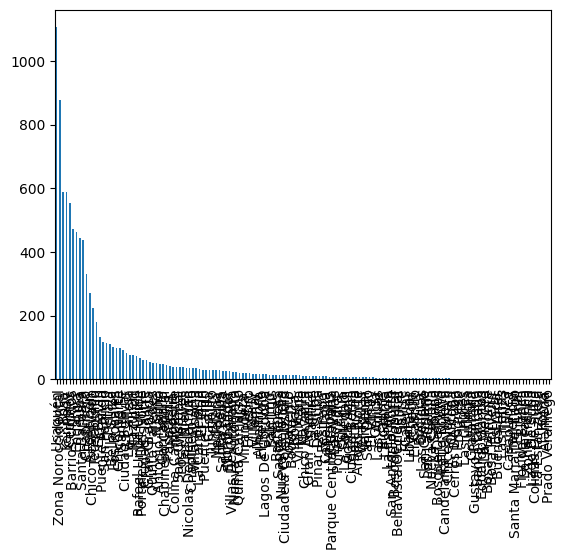

In [33]:
inmuebles_barrio.plot.bar()

mucha cantidad de barrios así que para clarificar el gráfico lo haremos con el top 10 de barrios:

<Axes: >

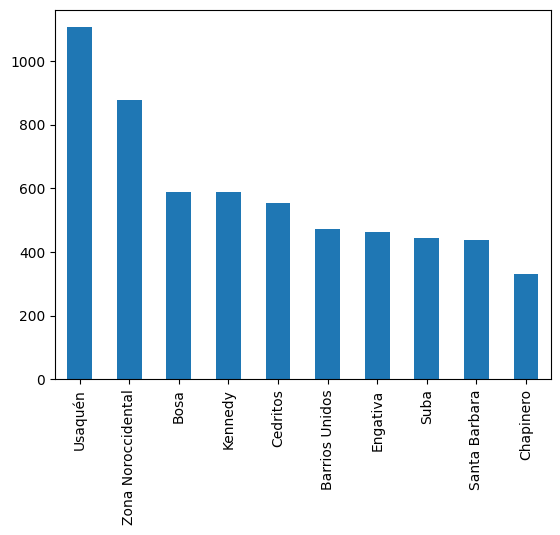

In [34]:
inmuebles_barrio.head(10).plot.bar()

quiero que aparezcan tanto un título para el gráfico como un nombre para los ejes, así que introduzco la siguiente modificación:

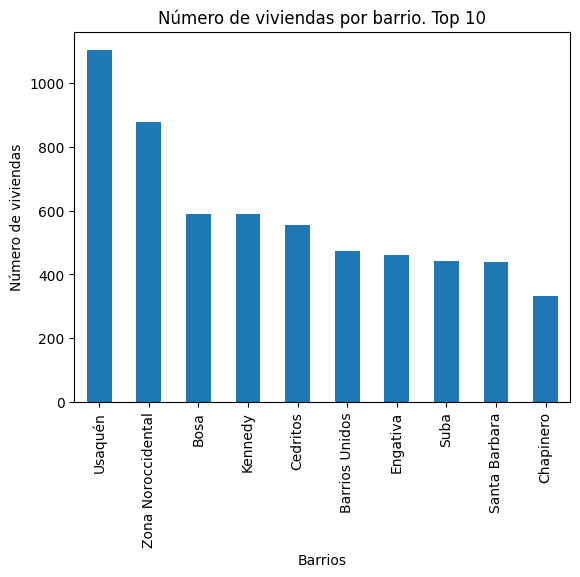

In [35]:
import matplotlib.pyplot as plt
inmuebles_barrio_bplt = inmuebles_barrio.head(10).plot.bar()
inmuebles_barrio_bplt.set_title('Número de viviendas por barrio. Top 10') #título del gráfico
inmuebles_barrio_bplt.set_xlabel('Barrios')   #defino un nombre para el eje X
inmuebles_barrio_bplt.set_ylabel('Número de viviendas') #lo mismo para el eje Y
plt.show()  #y ahora sí, muestro el gráfico

Quiero encontrar el *Promedio de Área de cada uno de los barrios*, pero primero volviendo a analizar el dataframe de inmuebles y quedándome con las columnas que preciso para ir obteniendo más detalles.

In [36]:
inmuebles_df

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,6.700000e+08
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,8.900000e+08
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,2.900000e+08
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,6.700000e+08
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,9.000000e+08
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,3.350000e+08


In [37]:
inmuebles_df[['Barrio', 'Área']]

,Barrio,Área
0,Zona Noroccidental,70
1,Castilla,170
2,Chico Reservado,144
3,Usaquén,154
4,Bella Suiza,128
...,...,...
9515,Kennedy,70
9516,Parque Central Bavaria,100
9517,Restrepo,383
9518,Engativa,183


In [38]:
inmuebles_df[['Barrio', 'Área']].sort_values(by='Barrio') #ordeno por Barrio

,Barrio,Área
5395,Alameda,97
7468,Alhambra,307
2241,Alhambra,197
1186,Alhambra,112
7878,Alhambra,86
...,...,...
5501,Zona Noroccidental,89
5496,Zona Noroccidental,370
5491,Zona Noroccidental,123
5465,Zona Noroccidental,55


In [39]:
area_media_barrio = inmuebles_df.groupby("Barrio")["Área"].mean().round(2) #área media por barrio y redondeando a 2 decimales
area_media_barrio

Barrio
Alameda                97.00
Alhambra              190.41
Andes Norte           124.86
Antonio Nariño        163.06
Barrancas              70.20
                       ...  
Villa Maria           207.15
Villas De Granada      86.59
Villemar               76.89
Zona Franca            54.00
Zona Noroccidental    135.79
Name: Área, Length: 149, dtype: float64

##Gráfico del Área media por Barrio para los 10 primeros barrios (alfabéticamente):

<Axes: xlabel='Barrio'>

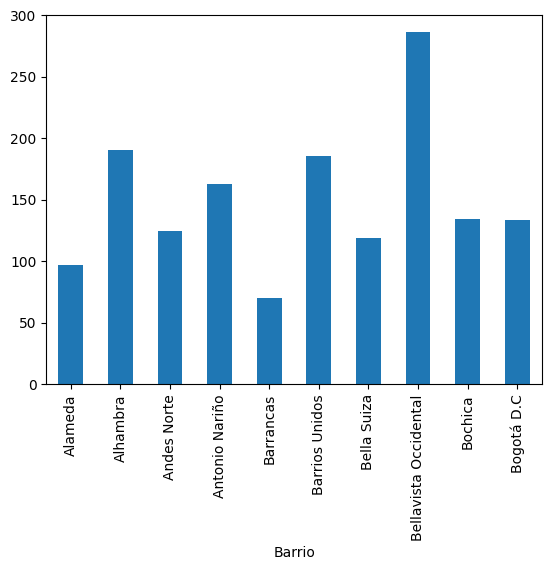

In [40]:
area_media_barrio.head(10).plot.bar()

Quiero lo mismo pero para el Top 10 de Barrios con mayor área media:

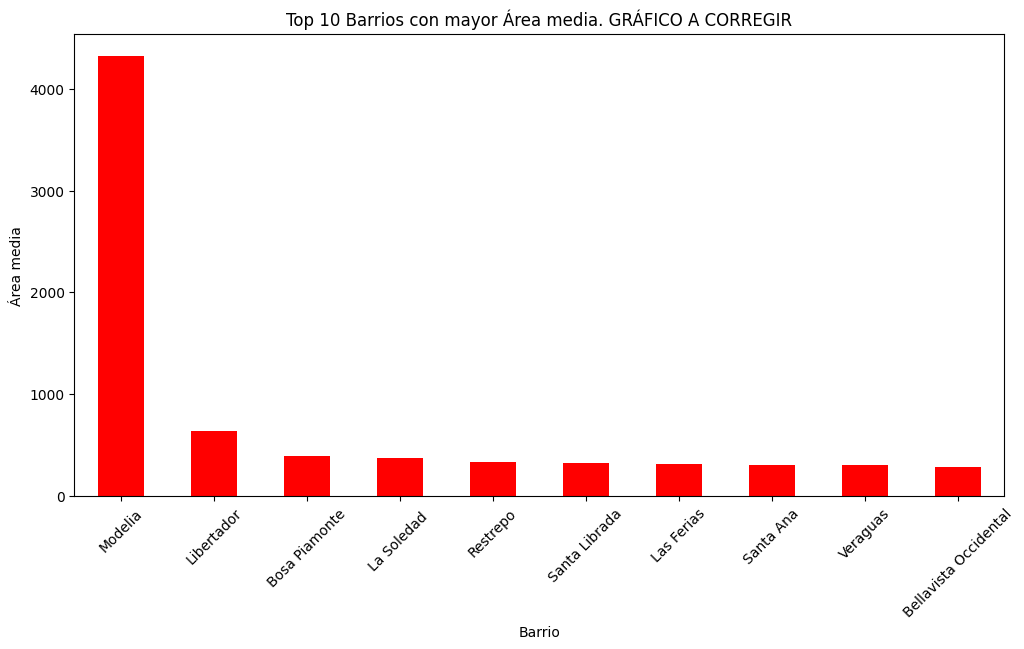

In [41]:
# Ordeno los barrios por área media de mayor a menor y tomo los 10 primeros
top_10_area_media_barrio = area_media_barrio.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_area_media_barrio.plot(kind="bar", color="red")
plt.title("Top 10 Barrios con mayor Área media. GRÁFICO A CORREGIR")
plt.xlabel("Barrio")
plt.ylabel("Área media")
plt.xticks(rotation=45)
plt.show()

Vemos que en Modelia valores ilógicos, así que entramos a ver en detalle. Obtengo la mayor Área de dicho Barrio, mostrando un dataframe con sólo esas columnas que me interesan:

In [42]:
inmuebles_df[inmuebles_df['Barrio'] == 'Modelia'][['Barrio','Área']].sort_values(by="Área", ascending=False)

,Barrio,Área
7073,Modelia,166243
8562,Modelia,400
4913,Modelia,320
2147,Modelia,320
4914,Modelia,320
5059,Modelia,287
7908,Modelia,275
9326,Modelia,270
2257,Modelia,244
1283,Modelia,236


In [43]:
inmuebles_df.iloc[7073]

Tipo                                                Casa
Descripción                     Casa en venta en Modelia
Habitaciones                                           4
Baños                                                  3
Área                                              166243
Barrio                                           Modelia
Unidad de Planeamiento Zonal                    Fontibón
Valor                                        850000000.0
Name: 7073, dtype: object

Cómo es ilógico una casa de 166243m^2 y no pudiendo acceder a los valores reales me decido a borrar ese registro para no alterar los valores promedio:

In [44]:
if 7073 in inmuebles_df.index:    #usado para que no arroje error si lo ejecuto una vez borrado el índice mencionado
    inmuebles_df = inmuebles_df.drop(7073)

Habiendo corregido lo anterior ahora sí presento el gráfico final:

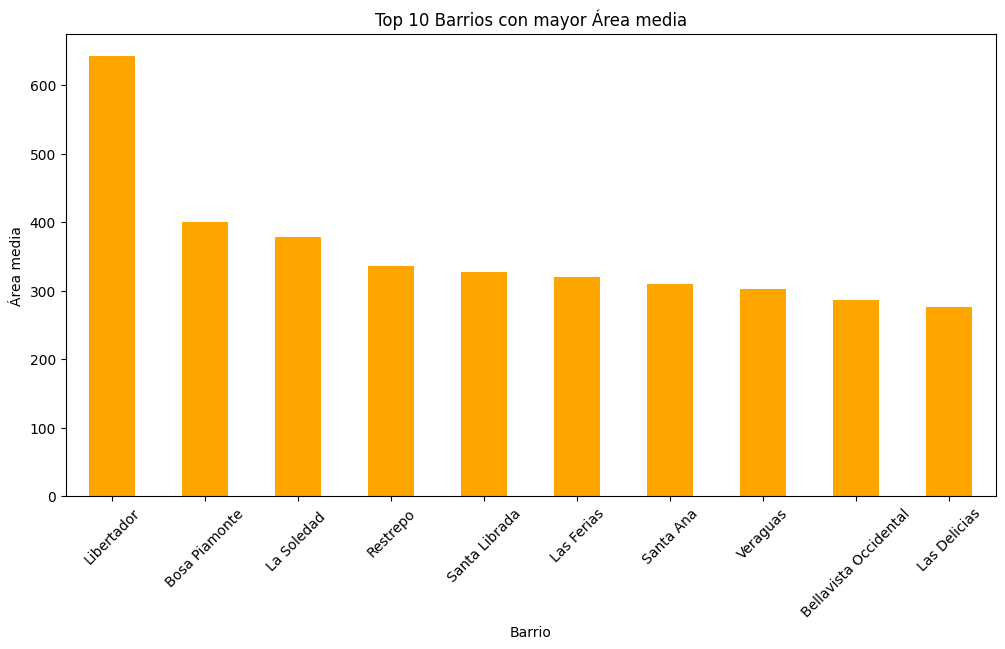

In [45]:
# Ordeno los barrios por área media de mayor a menor y tomo los 10 primeros
area_media_barrio = inmuebles_df.groupby("Barrio")["Área"].mean().round(2) #área media por barrio y redondeando a 2 decimales
top_10_area_media_barrio = area_media_barrio.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_area_media_barrio.plot(kind="bar", color="orange")
plt.title("Top 10 Barrios con mayor Área media")
plt.xlabel("Barrio")
plt.ylabel("Área media")
plt.xticks(rotation=45)
plt.show()

Obtengo más datos estadísticos del dataframe. Por ejemplo se ve algo ilógico como que hay 110 habitaciones como máximo. Resolveré eso más adelante.

In [46]:
inmuebles_df.describe()

,Habitaciones,Baños,Área,Valor
count,9519.000000,9519.000000,9519.000000,9.519000e+03
mean,3.072382,2.447841,129.215779,6.020363e+08
std,2.049942,1.255367,314.926239,7.046345e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.090000e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,15920.000000,1.600000e+10


In [47]:
inmuebles_df['Baños'].max() #máxima cantidad de baños

9

In [48]:
inmuebles_df[inmuebles_df['Baños']==9]  #listado de todas las viviendas que tienen 9 baños

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
1955,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,5.300000e+09
2090,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,5.800000e+09
2154,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,5.300000e+09
2221,Lote,Lote en venta en Barrios Unidos,8,9,746,Barrios Unidos,Los Andes,2.080000e+09
2264,Casa,Casa en venta en Suba,13,9,633,Suba,Suba,1.970000e+09
2315,Casa,Casa en venta en Teusaquillo,18,9,600,Teusaquillo,Teusaquillo,2.500000e+09
2435,Local,Local en venta en Marly,11,9,486,Marly,CHAPINERO: Pardo Rubio + Chapinero,3.300000e+09
2981,Finca,Finca en venta en Bella Suiza,6,9,800,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,5.000000e+09
3233,Casa,Casa en venta en Teusaquillo,13,9,500,Teusaquillo,Teusaquillo,2.200000e+09
3883,Local,Local en venta en Zona Noroccidental,12,9,490,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2.700000e+09


In [49]:
inmuebles_df['Área'].max() #máxima área

15920

In [50]:
inmuebles_df[inmuebles_df['Área']==15920]  #listado de todas las viviendas que tienen el área máxima

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1.250000e+09
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1.250000e+09


In [51]:
#debo eliminar esos registros los cuales son ilógicos:
for i in [3807, 6388]:
  if i in inmuebles_df.index:
    inmuebles_df = inmuebles_df.drop(i)

In [52]:
inmuebles_df['Área'].max() #máxima área

8884

In [53]:
inmuebles_df[inmuebles_df['Área']==8884]  #listado de todas las viviendas que tienen el área máxima

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
2279,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1.000000e+09
4697,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1.000000e+09


estoy viendo muchas viviendas que parecen ser duplicados. Sería para analizar en detalle y en todo caso eliminar los verdaderamente repetidos

In [54]:
inmuebles_df['Habitaciones'].max() #máxima cantidad de habitaciones

110

In [55]:
inmuebles_df[inmuebles_df['Habitaciones']==110]

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,480000000.0


110 habitaciones y sólo 2 baños es ilógico y además parece que se mezcló la carga del área con la cantidad de habitaciones, nuevamente elimino ese registro:

In [56]:
if 897 in inmuebles_df.index:    #usado para que no arroje error si lo ejecuto una vez borrado el índice mencionado
  inmuebles_df = inmuebles_df.drop(897)
inmuebles_df['Habitaciones'].max() #máxima cantidad de habitaciones, real

32

In [57]:
inmuebles_df[inmuebles_df['Habitaciones']==32]

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor
37,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,290500000.0
67,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,290500000.0


además de duplicado ahí parece que está considerando el edificio entero, no la venta de 1 unidad habitacional

Como los precios están son del orden del millón por simplicidad vamos a fijar 'Valor millones de $' como reemplazo de 'Valor':

In [58]:
inmuebles_df['Valor millones de $'] = inmuebles_df['Valor'] / 1000000
inmuebles_df.sample(10)

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor,Valor millones de $
3773,Apartamento,Apartamento en venta en Los Rosales,2,2,81,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,5.290000e+08,529.00
9079,Casa,Casa en venta en Suba,4,4,168,Suba,Suba,2.100000e+09,2100.00
3477,Casa,Casa en venta en Kennedy,5,4,176,Kennedy,Kennedy Central,4.500000e+08,450.00
6973,Apartamento,Apartamento en venta en Hayuelos,3,2,58,Hayuelos,Modelia,3.300000e+08,330.00
8857,Apartamento,Apartamento en venta en Kennedy,3,2,60,Kennedy,Kennedy Central,1.950000e+08,195.00
264,Apartamento,Apartamento en venta en Mazuren,3,3,85,Mazuren,El Prado,4.060000e+08,406.00
3502,Apartamento,Apartamento en venta en Mirandela,2,2,68,Mirandela,SUBA: La Academia + Guaymaral + San José de Ba...,2.722500e+08,272.25
8465,Apartamento,Apartamento en venta en Fontibón,2,2,68,Fontibón,Fontibón,3.400000e+08,340.00
4445,Apartamento,Apartamento en venta en Barrios Unidos,1,2,52,Barrios Unidos,Los Andes,2.412800e+08,241.28
2577,Apartamento,Apartamento en venta en Chico Norte,1,2,60,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,5.350000e+08,535.00


In [59]:
#elimino la antigua columna 'Valor':
del inmuebles_df['Valor'] #no veo que ande el hacer "del inmuebles_df.Valor" y entiendo debería...
inmuebles_df

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor millones de $
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.00
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,670.00
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,900.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,335.00


Nuevamente ejecuto el método describe() del dataframe para ver los datos estadísticos:

In [60]:
inmuebles_df.describe()

,Habitaciones,Baños,Área,Valor millones de $
count,9516.000000,9516.000000,9516.000000,9516.000000
mean,3.061160,2.447352,125.899012,601.912947
std,1.732579,1.255011,216.303079,704.681829
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.000000
75%,3.000000,3.000000,135.000000,680.000000
max,32.000000,9.000000,8884.000000,16000.000000


In [61]:
pd.set_option('display.precision',2)  #para tener una visualización de sólo 2 decimales
inmuebles_df.describe()

,Habitaciones,Baños,Área,Valor millones de $
count,9516.00,9516.00,9516.0,9516.00
mean,3.06,2.45,125.9,601.91
std,1.73,1.26,216.3,704.68
min,1.00,0.00,2.0,60.00
25%,2.00,2.00,57.0,250.00
50%,3.00,2.00,80.0,409.00
75%,3.00,3.00,135.0,680.00
max,32.00,9.00,8884.0,16000.00


Se desea graficar la distribución de valores de inmuebles. Para ellos usamos un histograma.

<Axes: ylabel='Frequency'>

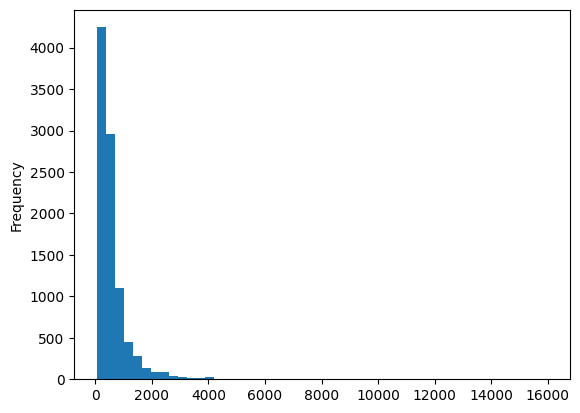

In [62]:
inmuebles_df['Valor millones de $'].plot.hist(bins=50)

Mejoramos el gráfico anterior usando Seaborn:

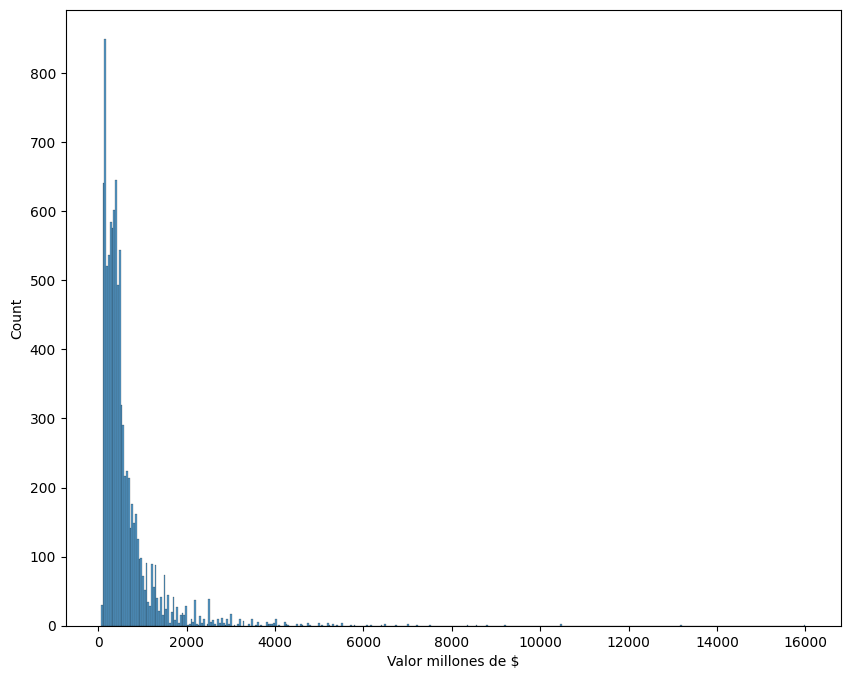

In [63]:
import seaborn as sns
plt.figure(figsize=(10,8))
grafico = sns.histplot(data=inmuebles_df, x='Valor millones de $')
plt.show()

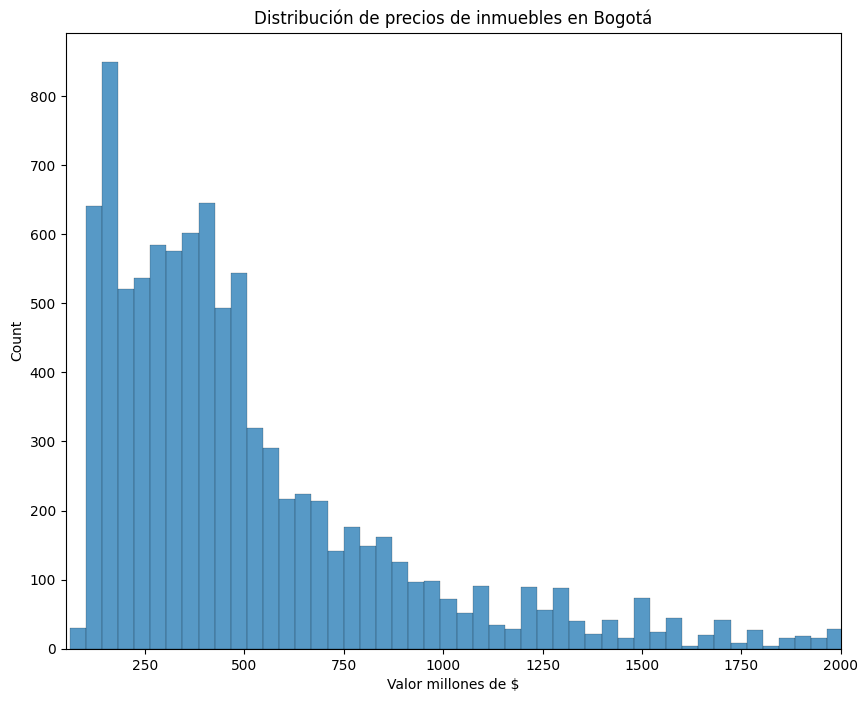

In [64]:
plt.figure(figsize=(10,8))
grafico = sns.histplot(data=inmuebles_df, x='Valor millones de $')
grafico.set_title('Distribución de precios de inmuebles en Bogotá')
plt.xlim((50,2000)) #para hacer zoom en la sección del eje X dónde se concentra la info
plt.show()

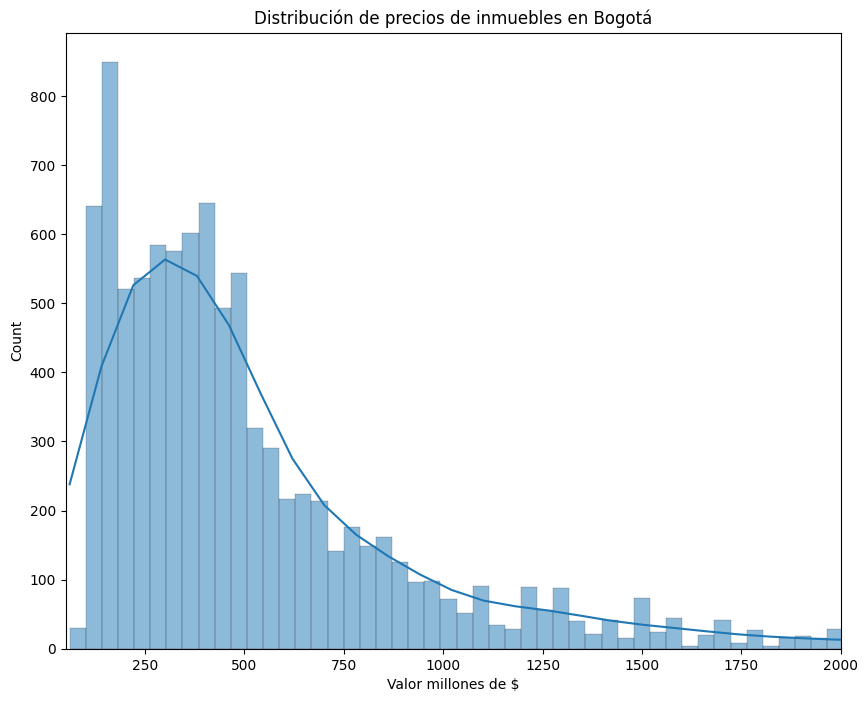

In [65]:
plt.figure(figsize=(10,8))
grafico = sns.histplot(data=inmuebles_df, x='Valor millones de $', kde=True)  #con "kde=True" se grafica la curva de densidad
grafico.set_title('Distribución de precios de inmuebles en Bogotá')
plt.xlim((50,2000)) #para hacer zoom en la sección del eje X dónde se concentra la info
plt.show()

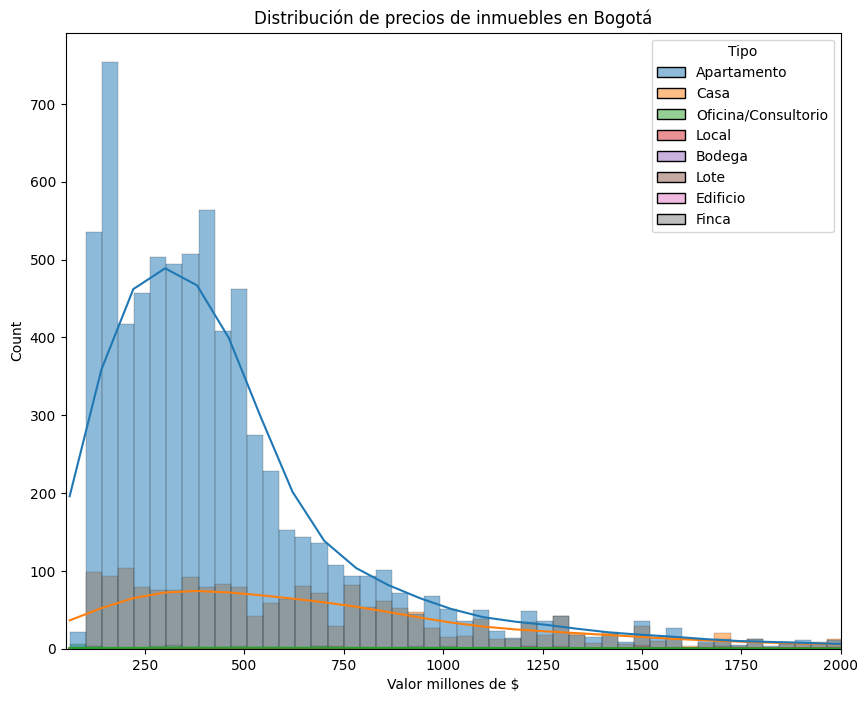

In [66]:
plt.figure(figsize=(10,8))
grafico = sns.histplot(data=inmuebles_df, x='Valor millones de $', kde=True, hue='Tipo')  #con "hue=Tipo" vemos la distribución por tipo de inmueble
grafico.set_title('Distribución de precios de inmuebles en Bogotá')
plt.xlim((50,2000)) #para hacer zoom en la sección del eje X dónde se concentra la info
plt.show()

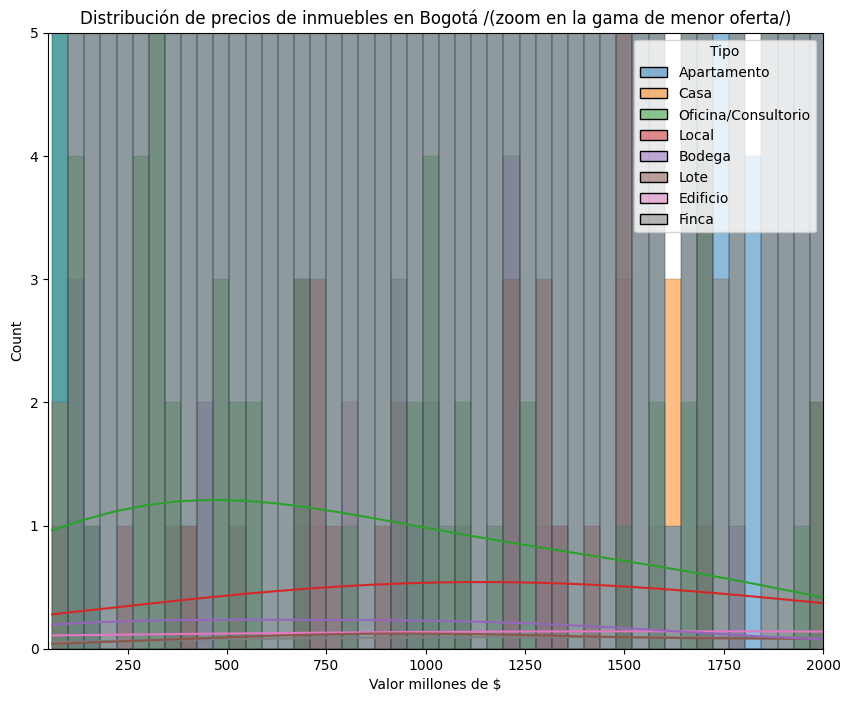

In [67]:
plt.figure(figsize=(10,8))
grafico = sns.histplot(data=inmuebles_df, x='Valor millones de $', kde=True, hue='Tipo')  #con "hue=Tipo" vemos la distribución por tipo de inmueble
grafico.set_title('Distribución de precios de inmuebles en Bogotá /(zoom en la gama de menor oferta/)')
plt.xlim((50,2000)) #para hacer zoom en la sección del eje X dónde se concentra la info
plt.ylim((0,5))  #*** hago zoom en el eje Y para ver los inmuebles que poseen menos cantidad y ver su distribución ***
plt.show()

Para cada vivienda calculamos el Valor de metro cuadrado y recordar que está en millones de pesos:

In [68]:
inmuebles_df.head()

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor millones de $
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.0
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670.0
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120.0
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890.0
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.0


In [69]:
inmuebles_df['Valor metro cuadrado millones de $'] = inmuebles_df['Valor millones de $']/inmuebles_df['Área']
inmuebles_df.head()

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor millones de $,Valor metro cuadrado millones de $
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.0,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670.0,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120.0,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890.0,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.0,7.58


In [70]:
inmuebles_df.groupby('Barrio').mean()

<ipython-input-70-3a35d6b33e0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles_df.groupby('Barrio').mean()


,Habitaciones,Baños,Área,Valor millones de $,Valor metro cuadrado millones de $
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [71]:
inmuebles_df[inmuebles_df['Barrio']=='Alhambra']

,Tipo,Descripción,Habitaciones,Baños,Área,Barrio,Unidad de Planeamiento Zonal,Valor millones de $,Valor metro cuadrado millones de $
1186,Apartamento,Apartamento en venta en Alhambra,2,2,112,Alhambra,La Alhambra,400.0,3.57
2032,Apartamento,Apartamento en venta en Alhambra,3,4,164,Alhambra,La Alhambra,780.0,4.76
2241,Casa,Casa en venta en Alhambra,3,2,197,Alhambra,La Alhambra,1100.0,5.58
2522,Casa,Casa en venta en Alhambra,4,5,360,Alhambra,La Alhambra,1400.0,3.89
2714,Casa,Casa en venta en Alhambra,4,5,278,Alhambra,La Alhambra,795.0,2.86
4505,Apartamento,Apartamento en venta en Alhambra,3,4,164,Alhambra,La Alhambra,780.0,4.76
4659,Casa,Casa en venta en Alhambra,3,2,197,Alhambra,La Alhambra,1100.0,5.58
5188,Apartamento,Apartamento en venta en Alhambra,2,2,113,Alhambra,La Alhambra,480.0,4.25
7449,Apartamento,Apartamento en venta en Alhambra,3,2,86,Alhambra,La Alhambra,450.0,5.23
7468,Casa,Casa en venta en Alhambra,4,4,307,Alhambra,La Alhambra,920.0,3.00
